In [72]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split

### Lendo o Dataframe

In [73]:
dados = pd.read_excel('Spam.xlsx')

### Separando o dataframe em 2, sendo 75% para o treino e 25% para o nosso programa avaliar

In [74]:
trainingSet, testSet = train_test_split(dados, test_size = 0.25)
trainingSet.head()


,Email,Class
2155,Hey cutie. How goes it? Here in WALES its kind...,ham
1067,Meeting u is my work. . . Tel me when shall i ...,ham
4971,I'm fine. Hope you are good. Do take care.,ham
2860,I am not at all happy with what you saying or ...,ham
4920,Its so common hearin How r u? Wat r u doing? H...,ham


### Separando o dataframe de treino entre spam e ham

In [75]:
trainingset_spam = trainingSet.loc[trainingSet.Class=='spam']
trainingset_ham = trainingSet.loc[trainingSet.Class=='ham']
trainingSet_ham_final = trainingset_ham['Email']
trainingSet_spam_final = trainingset_spam['Email']
trainigSet_tudo = trainingSet['Email']
x = testSet['Email']   #Dataframe para o teste

### Funcao para remover os caracteres especiais do dataframe de treino

In [76]:
def limpando_código (df):
    new_df = df.values.tolist()
    lista = []
    for i in new_df:
        lista.append(i.upper().split())
    caracteres_especiais = ['!',',','?','.','#',' ','...','(',')','*','&','@','+','-','"','<','>',"'"]
    for e in range(0,len(lista)):
        for i in lista[e]:
            if i in caracteres_especiais:
                lista[e].remove(i)
    return lista

### Funcao para criar um dicionario da quantidade de vezes que uma mesma palavra aparece

In [77]:
def dicionario (lista):
    dicionario = {}
    for e in lista:
        for i in e:
            if i not in dicionario:
                dicionario[i] = 1
            else:
                dicionario[i] +=1
    return dicionario

### Utilizando as funcoes

In [78]:
dicionario_ham = dicionario(limpando_código(trainingSet_ham_final))
dicionario_spam = dicionario(limpando_código(trainingSet_spam_final))
dicionario_tudo = dicionario(limpando_código(trainigSet_tudo))

### Quantidade de palavras em cada dicionario

In [79]:
total_palavras = len(dicionario_tudo)
total_palavras_spam = len(dicionario_spam)
total_palavras_ham = len(dicionario_ham)
palavra_spam_total_geral = total_palavras + total_palavras_spam
palavra_ham_total_geral = total_palavras + total_palavras_ham

In [80]:
dicionario_test = dicionario(limpando_código(x)) #Limpando a base para teste
lista_palavras = dicionario_test.keys()

### Calculando a probabilidade de cada palavra estar relacionada a um email spam ou nao

In [81]:
dic_prob_spam = {}
dic_prob_ham = {}
for e in lista_palavras:
    if e not in dicionario_ham:
        prob_ham = 1/palavra_ham_total_geral
        dic_prob_ham[e] = prob_ham
    else:
        prob_ham = (1+dicionario_ham[e])/palavra_ham_total_geral
        dic_prob_ham[e] = prob_ham
    if e not in dicionario_spam:
        prob_spam = 1/palavra_spam_total_geral
        dic_prob_spam[e] = prob_spam
    else:
        prob_spam = (1 + dicionario_spam[e])/palavra_spam_total_geral
        dic_prob_spam[e] = prob_spam

### Fazendo o teste na base de dados para teste

In [82]:
teste_final = limpando_código(testSet['Email'])
classificacao = []
for e in teste_final:
    prob_ham = 1
    prob_spam = 1
    for i in e:
        prob_spam *= dic_prob_spam[i]
        prob_ham *= dic_prob_ham[i]
    if prob_ham > prob_spam:
        classificacao.append(0)
    else:
        classificacao.append(1)

In [83]:
lista_certo = testSet['Class']
lista_final = []

## ham = 0 spam = 1

In [84]:
for e in lista_certo:
    if e == 'ham':
        lista_final.append(0)
    else:
        lista_final.append(1)

In [85]:
contador = 1
certo = 0
errado = 0 
for contador in range(0,len(classificacao)):
    if classificacao[contador] == lista_final[contador]:
        certo+=1
    else:
        errado+=1
    contador +=1
porcentagem_certo = certo/len(classificacao)
porcentagem_errado = errado/len(classificacao)
print(porcentagem_certo)
print(porcentagem_errado)


0.95908111988514
0.040918880114860015


### Calculando as porcentagens de falso positivos, positivos verdadeiros, falos negativos e negativos verdadeiros

In [86]:
def teste_separacoes (dados):
    trainingSet, testSet = train_test_split(dados, test_size = 0.25)
    trainingset_spam = trainingSet.loc[trainingSet.Class=='spam']
    trainingset_ham = trainingSet.loc[trainingSet.Class=='ham']
    trainingSet_ham_final = trainingset_ham['Email']
    trainingSet_spam_final = trainingset_spam['Email']
    trainigSet_tudo = trainingSet['Email']
    teste = testSet['Email']
    dicionario_test = dicionario(limpando_código(teste))
    dicionario_ham = dicionario(limpando_código(trainingSet_ham_final))
    dicionario_spam = dicionario(limpando_código(trainingSet_spam_final))
    dicionario_tudo = dicionario(limpando_código(trainigSet_tudo))
    lista_palavras = dicionario_test.keys()
    total_palavras = len(dicionario_tudo)
    total_palavras_spam = len(dicionario_spam)
    total_palavras_ham = len(dicionario_ham)
    palavra_spam_total_geral = total_palavras + total_palavras_spam
    palavra_ham_total_geral = total_palavras + total_palavras_ham
    dic_prob_spam = {}
    dic_prob_ham = {}
    for e in lista_palavras:
        if e not in dicionario_ham:
            prob_ham = 1/palavra_ham_total_geral
            dic_prob_ham[e] = prob_ham
        else:
            prob_ham = (1+dicionario_ham[e])/palavra_ham_total_geral
            dic_prob_ham[e] = prob_ham
        if e not in dicionario_spam:
            prob_spam = 1/palavra_spam_total_geral
            dic_prob_spam[e] = prob_spam
        else:
            prob_spam = (1 + dicionario_spam[e])/palavra_spam_total_geral
            dic_prob_spam[e] = prob_spam
    teste_final = limpando_código(testSet['Email'])
    classificacao = []
    for e in teste_final:
        prob_ham = 1
        prob_spam = 1
        for i in e:
            prob_spam *= dic_prob_spam[i]
            prob_ham *= dic_prob_ham[i]
        if prob_ham > prob_spam:
            classificacao.append(0)
        else:
            classificacao.append(1)
    lista_certo = testSet['Class']
    lista_final = []
    for e in lista_certo:
        if e == 'ham':
            lista_final.append(0)
        else:
            lista_final.append(1)
        contador = 1
        falso_spam = 0
        falso_ham = 0
        spam_certo = 0
        ham_certo = 0
    for contador in range(0,len(classificacao)):
        if classificacao[contador] == lista_final[contador]:
            if classificacao[contador] == 1:
                spam_certo +=1
            else:
                ham_certo+=1
                
        elif classificacao[contador] == 1:
            falso_spam +=1
        else:
            falso_ham +=1
            
        contador +=1
    porcentagem_falso_spam = falso_spam/len(classificacao)
    porcentagem_falso_ham = falso_ham/len(classificacao)
    porcentagem_spam_certo = spam_certo/len(classificacao)
    porcentagem_ham_certo = ham_certo/len(classificacao)
    return porcentagem_falso_spam, porcentagem_falso_ham, porcentagem_spam_certo, porcentagem_ham_certo

0.010768126346015794 0.029432878679109833 0.10265613783201723 0.8571428571428571
0.01148600143575018 0.03804737975592247 0.10768126346015794 0.8427853553481695
0.008614501076812634 0.0366116295764537 0.10337401292175162 0.8513998564249821
0.010050251256281407 0.033022254127781765 0.08686288585786073 0.8700646087580761
0.007896625987078248 0.02512562814070352 0.09188801148600144 0.8750897343862168


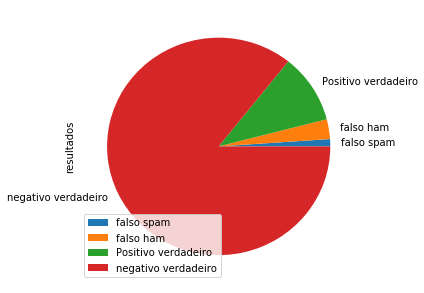

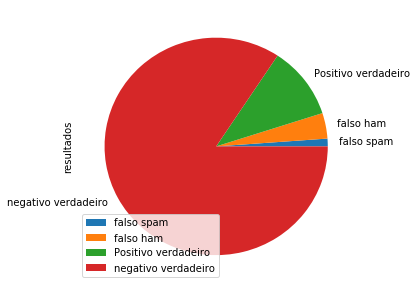

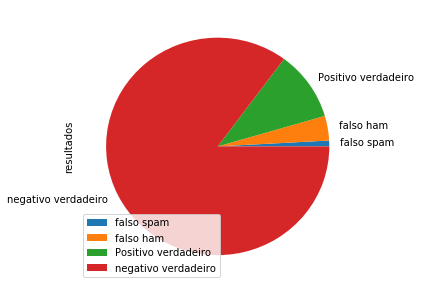

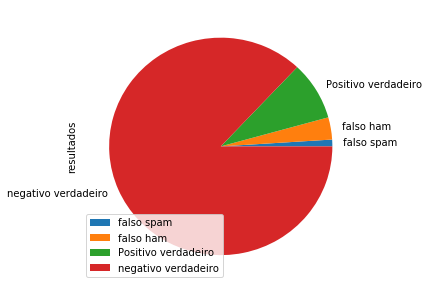

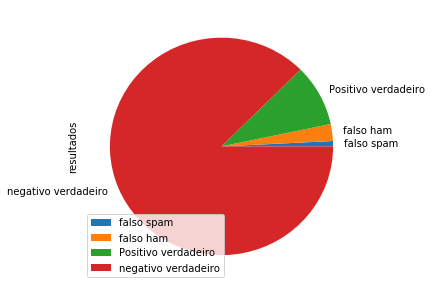

In [87]:
lista_positivo_verdadeiro = []
lista_negativo_verdadeiro = []
for e in range(0,5):
    falso_spam,falso_ham,positivo_verdadeiro,negativo_verdadeiro = teste_separacoes(dados)
    print(falso_spam,falso_ham,positivo_verdadeiro,negativo_verdadeiro)
   # df = pd.DataFrame({'porcentagem': [falso_spam,falso_ham,positivo_verdadeiro,negativo_verdadeiro]}, index=['Falso Spam', 'Falso Ham', 'Spam certo','Ham certo'])
   #plot = df.plot.pie(subplots=True, figsize=(5, 5))
    lista_positivo_verdadeiro.append(positivo_verdadeiro)
    lista_negativo_verdadeiro.append(negativo_verdadeiro)
    df = pd.DataFrame({'resultados': [falso_spam,falso_ham,positivo_verdadeiro,negativo_verdadeiro],
                   },
                   index=['falso spam', 'falso ham', 'Positivo verdadeiro', 'negativo verdadeiro'])
    plot = df.plot.pie(y='resultados', figsize=(5, 5))

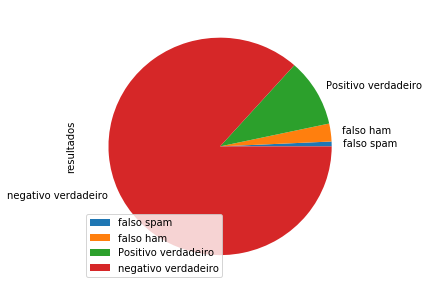

In [19]:
df = pd.DataFrame({'resultados': [falso_spam,falso_ham,positivo_verdadeiro,negativo_verdadeiro],
                   },
                   index=['falso spam', 'falso ham', 'Positivo verdadeiro', 'negativo verdadeiro'])
plot = df.plot.pie(y='resultados', figsize=(5, 5))